### Quin Daly
#### Math 402 HW 5.4

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2

### Exercise 5.21

In [39]:

def prob_5_21():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    
    # flatten images
    input_dim = 784 # 28*28
    X_train = X_train.reshape(60000, input_dim)
    X_test = X_test.reshape(10000, input_dim)
    X_train = X_train/255
    X_test = X_test/255
    
    # make dummies/one-hots for the classification
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    output_dim = 10 # number of classes
    soft = Sequential() # Set up
    soft.add(Dense(output_dim, input_dim=input_dim,activation='softmax',
    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
    soft.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Experiment with hyperparameters to find combo that gives best results
    soft.fit(X_train, Y_train,
             batch_size=128,
             epochs=12,
             verbose=1,
             validation_data=(X_test, Y_test))
    
    # Display a sample of predictions
    n = 16 # number of predictions to show
    X_new = X_test[:n]
    probs=soft.predict(X_new) #predicted probabilities
    class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

    # Plot
    cols = 4
    rows = (len(X_new)+cols-1)//cols
    plt.figure(figsize=(cols*2,rows*2))
    X_new = X_new.reshape(n,28,28) #unflatten into images
    for i,x in enumerate(X_new):
        ax = plt.subplot(rows,cols,i+1)
        ax.imshow(x, cmap='Greys')
        best_guess = np.argmax(probs[i])
        best_prob = int(probs[i][best_guess] * 100)
        ax.set_title(class_names[best_guess]+f' {best_prob}%')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Epoch 1/12
469/469 [==============================] - 1s 2ms/step - loss: 1.1546 - accuracy: 0.6555 - val_loss: 0.8729 - val_accuracy: 0.7165
Epoch 2/12
469/469 [==============================] - 1s 1ms/step - loss: 0.7867 - accuracy: 0.7533 - val_loss: 0.7508 - val_accuracy: 0.7547
Epoch 3/12
469/469 [==============================] - 1s 1ms/step - loss: 0.7025 - accuracy: 0.7782 - val_loss: 0.6961 - val_accuracy: 0.7739
Epoch 4/12
469/469 [==============================] - 1s 1ms/step - loss: 0.6566 - accuracy: 0.7920 - val_loss: 0.6600 - val_accuracy: 0.7864
Epoch 5/12
469/469 [==============================] - 1s 1ms/step - loss: 0.6264 - accuracy: 0.7998 - val_loss: 0.6357 - val_accuracy: 0.7923
Epoch 6/12
469/469 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.8065 - val_loss: 0.6172 - val_accuracy: 0.7977
Epoch 7/12
469/469 [==============================] - 1s 1ms/step - loss: 0.5874 - accuracy: 0.8113 - val_loss: 0.6031 - val_accuracy: 0.8014
Epoch 

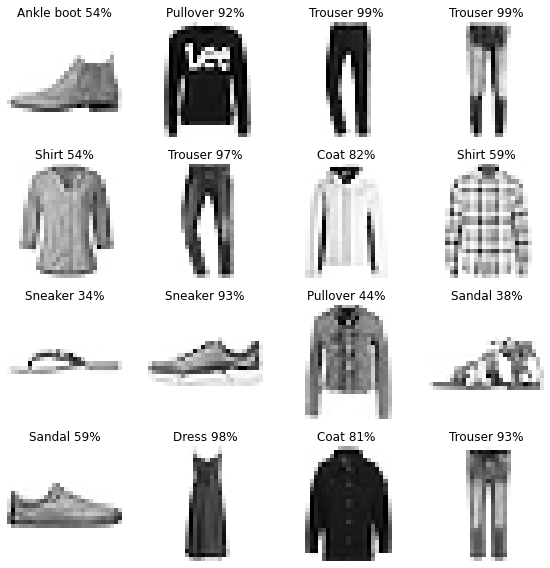

In [40]:
prob_5_21()